In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

# 음식물 쓰레기 데이터 추가

In [21]:
data = pd.read_csv('./01_제공데이터/01_음식물쓰레기_FOOD_WASTE.CSV', encoding='CP949')
data['base_date'] = pd.to_datetime(data['base_date'])

C:\Users\ghdwl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
data.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538


In [23]:
em = data.groupby(['base_date'])['em_cnt','em_g'].sum().reset_index().set_index('base_date')

<ipython-input-23-e3f1bbeb15e2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  em = data.groupby(['base_date'])['em_cnt','em_g'].sum().reset_index().set_index('base_date')


In [24]:
em

,em_cnt,em_g
base_date,,
2018-01-01,32512,85755000
2018-01-02,34664,90217650
2018-01-03,31025,80277600
2018-01-04,31540,80138700
2018-01-05,29709,75798600
...,...,...
2021-06-26,42717,93151550
2021-06-27,49087,103777500
2021-06-28,44871,96764250


In [25]:
log_em_g = np.log(em['em_g'] + 1).dropna()

In [26]:
log_em_cnt = np.log(em['em_cnt'] + 1).dropna()

<ipython-input-41-4f6c71ba593e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(em['em_g'].reset_index()['em_g'], model = 'additive',freq=30)


<Figure size 432x288 with 0 Axes>

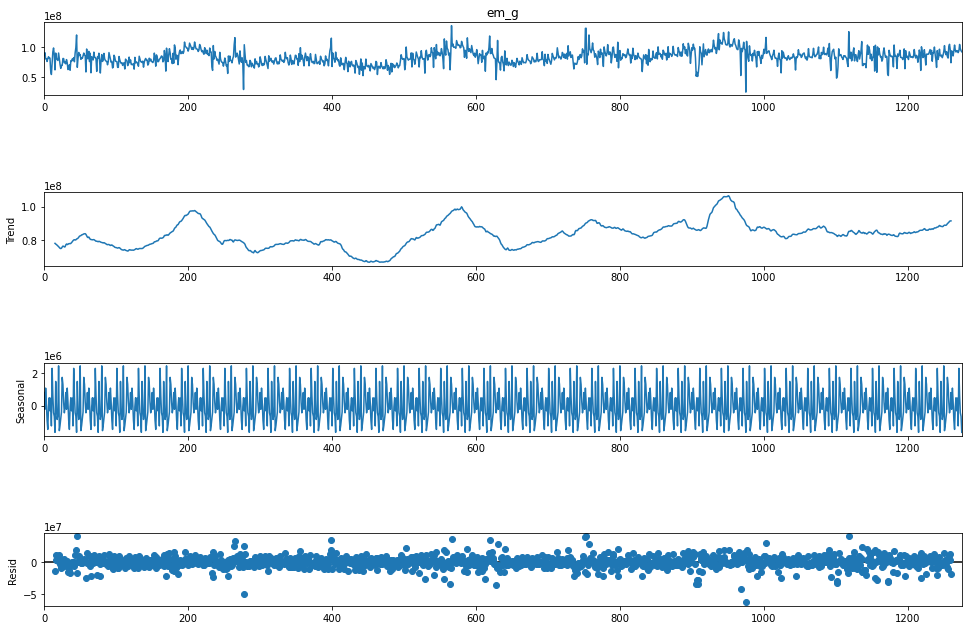

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(em['em_g'].reset_index()['em_g'], model = 'additive',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<ipython-input-42-df343c63e7ca>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(em['em_cnt'].reset_index()['em_cnt'], model = 'additive',freq=30)


<Figure size 432x288 with 0 Axes>

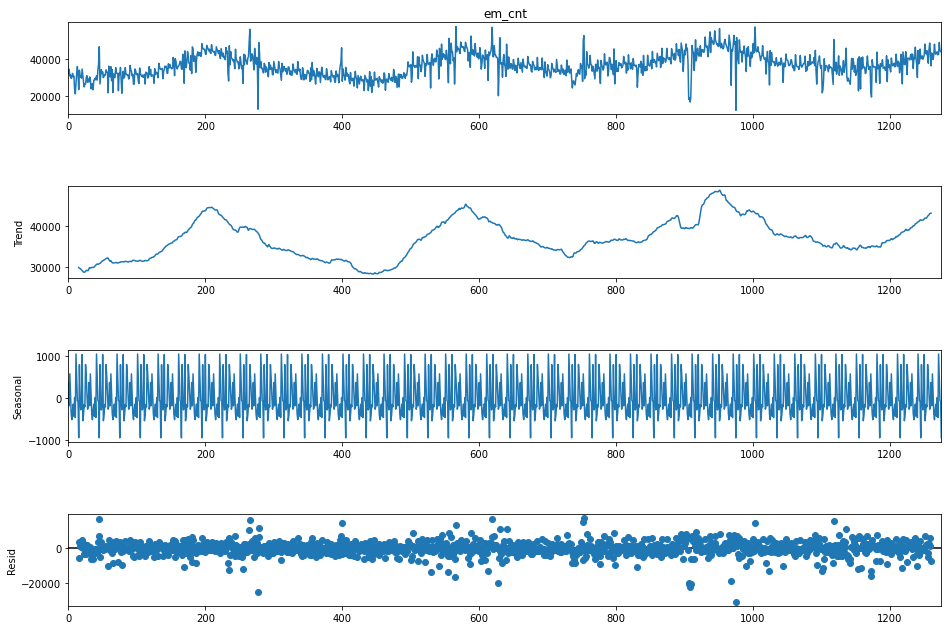

In [42]:
result = seasonal_decompose(em['em_cnt'].reset_index()['em_cnt'], model = 'additive',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

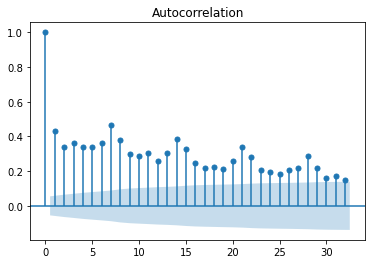

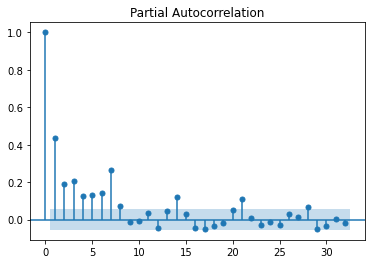

In [27]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(log_em_g)
sm.graphics.tsa.plot_pacf(log_em_g)
plt.show()
# p = 8

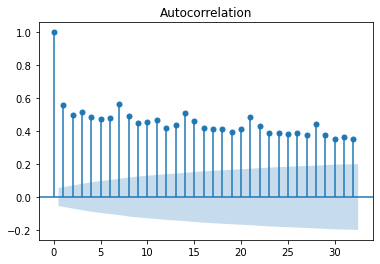

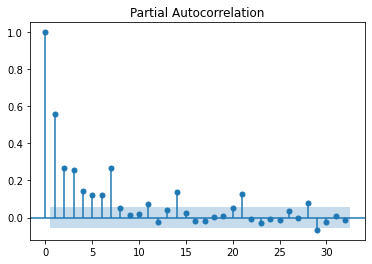

In [28]:
sm.graphics.tsa.plot_acf(log_em_cnt)
sm.graphics.tsa.plot_pacf(log_em_cnt)
plt.show()